In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

simulation_output = "./bucld-42-simulation-output78.csv"

df = pd.read_csv(simulation_output)
df.shape  # (num-rows, num-columns)

(307200, 27)

In [2]:
# the column names that store the learned param values
parameter_names = [p
                   for p in df.columns 
                   if '_' not in p and p != 'lang']
parameter_names[:3]

['SP', 'HIP', 'HCP']

In [3]:
def int2binstr(i):
    "Returns a 13-bit binary repr of a number"
    return format(i, '013b')

def param_name_to_int(param):
    """ Converts a parameter name into its integer equivalent, 
    derived from its position in the grammar bitstring """
    
    return 1 << (len(parameter_names) - parameter_names.index(param) - 1)

In [4]:
import math
pd.DataFrame(
    [(p, 
      int(math.log(param_name_to_int(p), 2))+1, 
      param_name_to_int(p))
        for p in parameter_names],
    columns=['param name', 'param number', 'bitstring value'])

,param name,param number,bitstring value
0,SP,13,4096
1,HIP,12,2048
2,HCP,11,1024
3,OPT,10,512
4,NS,9,256
5,NT,8,128
6,WHM,7,64
7,PI,6,32
8,TM,5,16
9,VtoI,4,8


In [5]:
def jiggle(size, width=0):
    " Return `size` random values centered around zero from -width/2 to width/2."
    j = np.random.random(size) * 2 - 1
    return j * (width / 2)

# Scatterplot

Offsetting the closed circles to the left and the open to the right is more honest, but less pretty. The only place it really matters is AH though.

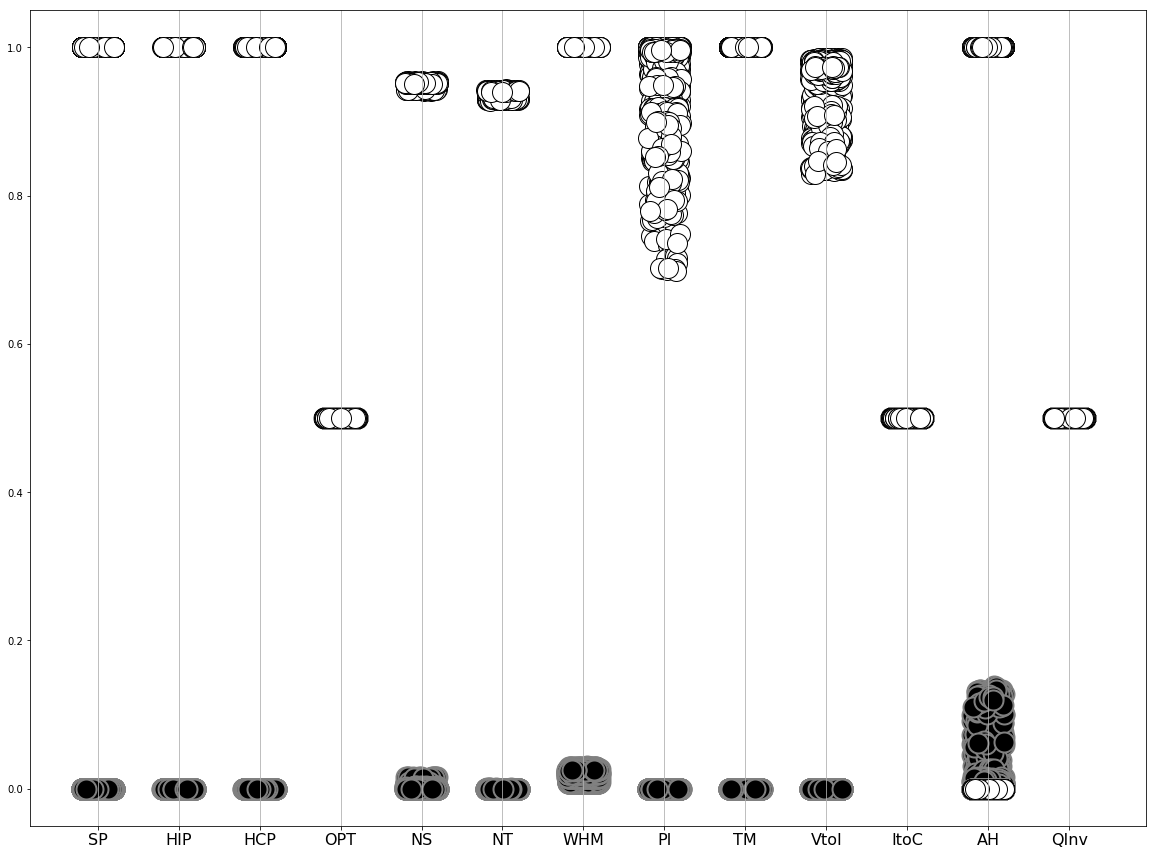

In [11]:
#parameter_names = [p for p in parameter_names if p not in SKIPPED_PARAMS]

plt.rcParams['figure.figsize'] = 20, 15
fig, ax = plt.subplots(1,1) 

lang_means = df.groupby('lang')[parameter_names].mean()
lang_means['lang'] = lang_means.index
circle_size = 400

for index, param in enumerate(parameter_names):
    
    param_is_on = np.bitwise_and(param_name_to_int(param), lang_means.lang).gt(0)
    expected_zero = lang_means[~param_is_on]
    expected_one = lang_means[param_is_on]
    
    # the closed circles
    ax.scatter(x=index + jiggle(len(expected_zero), 0.4) + 0,
               y=expected_zero[param], 
               marker='o', 
               s=circle_size,
               lw=2,
               edgecolors='gray',
               facecolors='black')
    
    # the open circles
    ax.scatter(x=index + jiggle(len(expected_one), 0.4) - 0,
                y=expected_one[param], 
                marker='o', 
                lw=1,
                s=circle_size,
                edgecolors='black',
                facecolors='white')

ax.set_xticks(np.arange(0, len(parameter_names)))
ax.set_xticklabels(parameter_names, fontsize=16)

plt.ylim(-0.05, 1.05) 
plt.grid(axis='x')